In [1]:
from scipy.stats import poisson
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv", index_col=0)
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])
df_allmatch

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,HomeRD,AwayRD
ID,,,,,,,,,,,,,,,,
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0
6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500,1500,0,0
6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500,1500,0,0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1594,1560,4,-6
20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1515,1524,9,-13
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7


### サッカーの得点数とポアソン分布の関係性

In [3]:
ave_score = (df_allmatch["HomeGF"].sum()+df_allmatch["AwayGF"].sum()) / (4590*2)
ave_score

1.361764705882353

In [4]:
scores = []
for s in  df_allmatch[["HomeGF","AwayGF"]].values:
    scores.extend(s)

In [5]:
actual = []
for i in range(9):
    actual.append(scores.count(i)/len(scores))

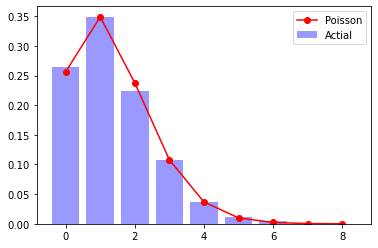

In [6]:
x =  np.arange(0, 9, 1)
plt.plot(x, poisson.pmf(x, ave_score), label='Poisson', marker='o',c ='r')
plt.bar(x, actual,  color="blue",alpha=0.4, label="Actial")

plt.legend()
plt.show()

06-20シーズンまでの1試合での1チームの平均得点数は1.36｡

上図の赤線が平均1.36得点起こる際の各得点別の確率をポワソン分布で算出して折れ線グラフにしたもの｡
青色の棒グラフが､実際に06-20シーズンでの1試合での1チームの得点数のヒストグラム｡

赤線と青の棒グラフを比較するとほぼ一致することがわかる｡

つまりサッカーの得点数がポアソン分布に従うと言える｡

---
### 攻撃力･守備力の算出

一定期間での各チームの得点･失点の平均をリーグの得点･失点の平均で割って比率を算出する｡
その比率(リーグ平均と比較して何倍得点しやすいか･失点しやすいか度合い)を攻撃力･守備力とみなす｡
攻撃力は多ければ得点数が多いのに対し､守備力は少なければ失点が少ない(≒強い)ことになる｡

平均データを取得する期間･範囲は直近5ヶ月とする｡
試合数で区切らないのはチームによって消化試合数が異なり､リーグ平均を出すのが困難なため｡

In [7]:
import datetime
from dateutil.relativedelta import relativedelta

In [12]:
#ホームでの平均得点
homegf_ave = df_recent_home["HomeGF"].mean()

In [13]:
#ホームでの平均失点
homega_ave = df_recent_home["AwayGF"].mean()

In [14]:
# アウェイでの平均得点
awaygf_ave = df_recent_away["AwayGF"].mean()

In [15]:
#アウェイでの平均失点
awayga_ave = df_recent_away["HomeGF"].mean()

In [16]:
homegf_ave,homega_ave,awaygf_ave,awayga_ave

(2.0714285714285716, 2.0, 0.9285714285714286, 2.142857142857143)

In [80]:
def get_ave_gfga(match_id,date_range=5):
    current_day = df_allmatch.at[match_id,"Date"]
    home = df_allmatch.at[match_id,"Home"]
    away = df_allmatch.at[match_id,"Away"]
    
    df_recent = df_allmatch[
        (current_day-relativedelta(months=date_range) < df_allmatch["Date"] ) &
        (df_allmatch["Date"] < current_day) 
    ]
    
    df_recent_home = df_recent[df_recent["Home"] == home]
    df_recent_away = df_recent[df_recent["Away"] == away]

    homegf_ave = df_recent_home["HomeGF"].mean()
    homega_ave = df_recent_home["AwayGF"].mean()
    awaygf_ave = df_recent_away["AwayGF"].mean()
    awayga_ave = df_recent_away["HomeGF"].mean()
    homegf_league_ave = df_recent["HomeGF"].mean()
    awaygf_league_ave = df_recent["AwayGF"].mean()
    

    print(f"{home}のホームでの平均得点 : {homegf_ave}")
    print(f"{home}のホームでの平均失点 : {homega_ave}")
    print(f"{away}のアウェイでの平均得点 : {awaygf_ave}")
    print(f"{away}のアウェイでの平均失点 : {awayga_ave}")
    print(f"リーグ全体のホームでの平均得点 : {homegf_league_ave}")
    print(f"リーグ全体のアウェイでの平均得点 : {awaygf_league_ave}")    

In [108]:
get_ave_gfga(18290713)

shimizu-s-pulseのホームでの平均得点 : 2.0
shimizu-s-pulseのホームでの平均失点 : 1.5714285714285714
jubilo-iwataのアウェイでの平均得点 : 0.42857142857142855
jubilo-iwataのアウェイでの平均失点 : 1.2857142857142858
リーグ全体のホームでの平均得点 : 1.5182481751824817
リーグ全体のアウェイでの平均得点 : 1.313868613138686


In [111]:
match_id = 18290713	
date_range = 5

current_day = df_allmatch.at[match_id,"Date"]
home = df_allmatch.at[match_id,"Home"]
away = df_allmatch.at[match_id,"Away"]

df_recent = df_allmatch[
    (current_day-relativedelta(months=date_range) < df_allmatch["Date"] ) &
    (df_allmatch["Date"] < current_day) 
]

df_recent_home = df_recent[df_recent["Home"] == home]
df_recent_away = df_recent[df_recent["Away"] == away]

homegf_ave = df_recent_home["HomeGF"].mean()
homega_ave = df_recent_home["AwayGF"].mean()
awaygf_ave = df_recent_away["AwayGF"].mean()
awayga_ave = df_recent_away["HomeGF"].mean()
homegf_league_ave = df_recent["HomeGF"].mean()
awaygf_league_ave = df_recent["AwayGF"].mean()


print(f"{home}のホームでの平均得点 : {homegf_ave}")
print(f"{home}のホームでの平均失点 : {homega_ave}")
print(f"{away}のアウェイでの平均得点 : {awaygf_ave}")
print(f"{away}のアウェイでの平均失点 : {awayga_ave}")
print(f"リーグ全体のホームでの平均得点 : {homegf_league_ave}")
print(f"リーグ全体のアウェイでの平均得点 : {awaygf_league_ave}")

home_attack = homegf_ave / homegf_league_ave
away_defense = awayga_ave / homegf_league_ave
homegf_pred = home_attack * away_defense * homegf_league_ave

away_attack = awaygf_ave / awaygf_league_ave
home_defense = homega_ave / awaygf_league_ave
awaygf_pred = away_attack * home_defense * awaygf_league_ave

print(f"得点予測  {home} {homegf_pred:.2f} - {awaygf_pred:.2f} {away}")

shimizu-s-pulseのホームでの平均得点 : 2.0
shimizu-s-pulseのホームでの平均失点 : 1.5714285714285714
jubilo-iwataのアウェイでの平均得点 : 0.42857142857142855
jubilo-iwataのアウェイでの平均失点 : 1.2857142857142858
リーグ全体のホームでの平均得点 : 1.5182481751824817
リーグ全体のアウェイでの平均得点 : 1.313868613138686
得点予測  shimizu-s-pulse 1.69 - 0.51 jubilo-iwata


In [112]:
# ホームチームの得点のしやすさ(攻撃力)
home_attack = homegf_ave / homegf_league_ave
home_attack

1.3173076923076923

In [113]:
#アウェイチームの失点のしやすさ(守備力)
away_defense = awayga_ave / homegf_league_ave
away_defense

0.8468406593406594

In [114]:
# アウェイチームの得点のしやすさ(攻撃力)
away_attack = awaygf_ave / awaygf_league_ave
away_attack

0.3261904761904762

In [115]:
# ホームチームの失点のしやすさ(守備力)
home_defense = homega_ave / awaygf_league_ave
home_defense

1.196031746031746

### 得点予測

ホームチームの攻撃力にアウェイチームの守備力とリーグ全体のホームチームの平均ゴール数をかけることでホームチームの得点数を予測する｡(アウェイチームの得点数も同様)

平均から何倍得点しやすいか､失点しやすいかをそれぞれかけた値を予測値とする

In [116]:
#ホームチームの予想得点数
homegf_pred = home_attack * away_defense * homegf_league_ave
homegf_pred

1.6936813186813187

In [117]:
# アウェイチームの予想得点数
awaygf_pred = away_attack * home_defense * awaygf_league_ave
awaygf_pred

0.5125850340136054

予測結果は1.69対0.51となった｡
上記の予測を平均値として､ポアソン分布で各スコア別の確率を出す

ex) 
1-0 20%
2-0 18%
1-1 13%
2-1 10% ...

### ポワソン分布で各スコアの確率を算出

J1での1試合の最多得点が9点であることから,ポワソン分布の幅を0-9点とし､10得点以上することはないと考えるが､10点得点以上のゲーム(0-10､10-10､15-20､､､､)の確率も存在してしまうため､最終的に予測した勝率､敗率､分率の和を割合にして､分母が100%になるようにする｡


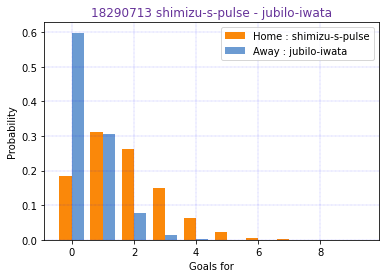

In [206]:
home_poisson = poisson.pmf(x, homegf_pred)
away_poisson = poisson.pmf(x, awaygf_pred)

x =  np.arange(0, 10, 1)
plt.bar(x, home_poisson, align="edge", width=-0.4,  color="#FA880A", label=f'Home : {home}')
plt.bar(x, away_poisson, align="edge", width= 0.4,  color="#6C9BD2", label=f'Away : {away}')

plt.xlabel('Goals for')
plt.ylabel('Probability')
plt.grid(color='b', linestyle=':', linewidth=0.3)
plt.title(f"{match_id} {home} - {away}", color='rebeccapurple')
plt.legend()
plt.show()


In [207]:
df_poisson = pd.DataFrame([home_poisson,away_poisson],columns=x, index=[home,away])
df_poisson

,0,1,2,3,4,5,6,7,8,9
shimizu-s-pulse,0.183841,0.311369,0.263680,0.148863,0.063032,0.021351,0.006027,0.001458,3.087284e-04,5.809862e-05
jubilo-iwata,0.598945,0.307010,0.078684,0.013444,0.001723,0.000177,0.000015,0.000001,7.079360e-08,4.031971e-09


### 試合の勝,負,分の予測確率を出す

In [243]:
win_prob_sum = 0
loss_prob_sum = 0
draw_prob_sum = 0

for gf in x:
    gf_prob = df_poisson.at[home, gf]
    for ga in x:
        ga_prob = df_poisson.at[away,ga]
        score_prob = gf_prob * ga_prob
        
        if gf>ga:
            win_prob_sum += score_prob
        elif gf<ga:
            loss_prob_sum += score_prob
        else:
            draw_prob_sum += score_prob

In [244]:
prob_sum = win_prob_sum+loss_prob_sum+draw_prob_sum
prob_sum

0.999988399151543

In [245]:
win_prob_sum = win_prob_sum/prob_sum
loss_prob_sum = loss_prob_sum/prob_sum
draw_prob_sum = draw_prob_sum/prob_sum

In [248]:
win_prob_sum+loss_prob_sum+draw_prob_sum

1.0

In [250]:
print(f"{home} - {away}")
print(f"win {win_prob_sum:.2%}")
print(f"loss {loss_prob_sum:.2%}")
print(f"draw {draw_prob_sum:.2%}")

shimizu-s-pulse - jubilo-iwata
win 66.41%
loss 10.74%
draw 22.86%


In [253]:
df_allmatch.loc[18290713]

Year                          2018
Sec                             29
Date           2018-10-07 00:00:00
Home               shimizu-s-pulse
Away                  jubilo-iwata
HomeID                           7
AwayID                          13
HomeGF                           5
AwayGF                           1
W/L                              1
Stadium                       アイスタ
Attendances                  19159
HomeRate                      1447
AwayRate                      1497
HomeRD                          12
AwayRD                          -7
Name: 18290713, dtype: object

### 評価･考察

66.4/10.7/22.9というもっともらしい予測結果になった｡(試合結果は5-1) EloRatingで勝率を出すのとはぜんぜん違う感じになりそう｡Ratingは急激に上がらないのに対し､このポアソン分布は直近5ヶ月に絞っているので､直近の強さを可視化出来ている可能性がある｡

長期でこの手法の評価をするために以下で関数化する

In [310]:
def predict_with_poisson(match_id,date_range=5):
    
    current_day = df_allmatch.at[match_id,"Date"]
    home = df_allmatch.at[match_id,"Home"]
    away = df_allmatch.at[match_id,"Away"]

    df_recent = df_allmatch[
        (current_day-relativedelta(months=date_range) < df_allmatch["Date"] ) &
        (df_allmatch["Date"] < current_day) 
    ]

    df_recent_home = df_recent[df_recent["Home"] == home]
    df_recent_away = df_recent[df_recent["Away"] == away]

    homegf_ave = df_recent_home["HomeGF"].mean()
    homega_ave = df_recent_home["AwayGF"].mean()
    awaygf_ave = df_recent_away["AwayGF"].mean()
    awayga_ave = df_recent_away["HomeGF"].mean()
    homegf_league_ave = df_recent["HomeGF"].mean()
    awaygf_league_ave = df_recent["AwayGF"].mean()
    
    # 欠損値処理
    # 13-20までのJ2降格チームの平均得点と平均失点が0.99と1.72
    if  homegf_ave is np.nan:
        homegf_ave = 1.09
    if homega_ave is np.nan:
        homega_ave = 1.62
    if awaygf_ave is np.nan:
        awaygf_ave = 0.89
    if awayga_ave is np.nan:
        awayga_ave = 1.82

    print(f"{home}のホームでの平均得点 : {homegf_ave}")
    print(f"{home}のホームでの平均失点 : {homega_ave}")
    print(f"{away}のアウェイでの平均得点 : {awaygf_ave}")
    print(f"{away}のアウェイでの平均失点 : {awayga_ave}")
    print(f"リーグ全体のホームでの平均得点 : {homegf_league_ave}")
    print(f"リーグ全体のアウェイでの平均得点 : {awaygf_league_ave}")

    home_attack = homegf_ave / homegf_league_ave
    away_defense = awayga_ave / homegf_league_ave
    homegf_pred = home_attack * away_defense * homegf_league_ave

    away_attack = awaygf_ave / awaygf_league_ave
    home_defense = homega_ave / awaygf_league_ave
    awaygf_pred = away_attack * home_defense * awaygf_league_ave

    print(f"得点予測  {home} {homegf_pred:.2f} - {awaygf_pred:.2f} {away}")
    
    x =  np.arange(0, 10, 1)
    home_poisson = poisson.pmf(x, homegf_pred)
    away_poisson = poisson.pmf(x, awaygf_pred)

    plt.bar(x, home_poisson, align="edge", width=-0.4,  color="#FA880A", label=f'Home : {home}')
    plt.bar(x, away_poisson, align="edge", width= 0.4,  color="#6C9BD2", label=f'Away : {away}')

    plt.xlabel('Goals for')
    plt.ylabel('Probability')
    plt.grid(color='b', linestyle=':', linewidth=0.3)
    plt.title(f"{match_id} {home} - {away}", color='rebeccapurple')
    plt.legend()
    plt.show()
    
    df_poisson = pd.DataFrame([home_poisson,away_poisson],columns=x, index=[home,away])
    
    win_prob_sum = 0
    loss_prob_sum = 0
    draw_prob_sum = 0

    for gf in x:
        gf_prob = df_poisson.at[home, gf]
        for ga in x:
            ga_prob = df_poisson.at[away,ga]
            score_prob = gf_prob * ga_prob

            if gf>ga:
                win_prob_sum += score_prob
            elif gf<ga:
                loss_prob_sum += score_prob
            else:
                draw_prob_sum += score_prob
                
    prob_sum = win_prob_sum+loss_prob_sum+draw_prob_sum
    win_prob_sum = win_prob_sum/prob_sum
    loss_prob_sum = loss_prob_sum/prob_sum
    draw_prob_sum = draw_prob_sum/prob_sum
    
    print(f"{home} - {away}")
    print(f"win {win_prob_sum:.2%} loss {loss_prob_sum:.2%} draw {draw_prob_sum:.2%}")
    
    return draw_prob_sum,win_prob_sum,loss_prob_sum
                

vissel-kobeのホームでの平均得点 : 2.0
vissel-kobeのホームでの平均失点 : 1.0
yokohama-fcのアウェイでの平均得点 : 0.89
yokohama-fcのアウェイでの平均失点 : 1.82
リーグ全体のホームでの平均得点 : 1.3376623376623376
リーグ全体のアウェイでの平均得点 : 1.2987012987012987
得点予測  vissel-kobe 2.72 - 0.69 yokohama-fc


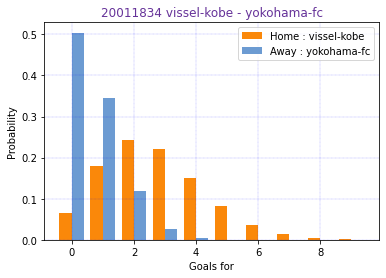

vissel-kobe - yokohama-fc
win 80.05% loss 6.88% draw 13.06%


(0.13061270674147066, 0.8005431919087876, 0.06884410134974157)

In [311]:
predict_with_poisson(20011834)